**DATA UNDERSTANDING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process

In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.1 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#  df = pd.read_excel('/content/drive/MyDrive/zameen-eda-project/data/Zameen.com.xlsx')

NameError: name 'pd' is not defined

In [2]:
# --- Setup: Clone repo so paths work in Colab ---
!git clone https://github.com/SanaEjazSwitzerland/zameen-eda-project.git
%cd zameen-eda-project/notebook

Cloning into 'zameen-eda-project'...
[Errno 2] No such file or directory: 'zameen-eda-project/notebook'
/content


In [ ]:
df = pd.read_excel("../data/Zameen.com.xlsx")

In [ ]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

                                               Title  \
0  Hmr Waterfront 2 Bed Room Premium Apartment On...   
1  Chance Deal! Luxury 2 Bedroom Seafront Apartme...   
2  Luxury 1 Bed At H& S Residence By Japanese Arc...   
3  Luxury 1 Bed Seafront Apartment at HMR waterfr...   
4  2 Bed Apartment For Booking On 3 Years | Saima...   

                                                 URL     City  Type  \
0  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
1  https://www.zameen.com/Property/dha_defence_dh...  Karachi  Flat   
2  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
3  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
4  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   

          Area            Price   Purpose                     Location  \
0  128 Sq. Yd.  PKR\n4.75 Crore  For Sale  DHA Defence, Karachi, Sindh   
1  161 Sq. Yd.  PKR\n6.25 Crore  For Sale  DHA Defence, Karachi, Sindh   
2  111 Sq. Yd.

**2. DATA PRE-PROCESSING**

REMOVE DUPLICATES

In [ ]:

# Remove duplicates
df.drop_duplicates(inplace=True)

CLEAN PRICE COLUMN & AREA COLUMN

In [ ]:
# Clean price column
if 'Price' in df.columns:
  df['Price'] = df['Price'].astype(str).str.replace(r"[^0-9.]", "", regex=True)
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Clean area column
if 'Area' in df.columns:
  df['Area'] = df['Area'].astype(str).str.replace(r"[^0-9.]", "", regex=True)
  df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

**3. MISSING VALUES TREATMENT**

In [ ]:

# 3. Missing Values Treatment
# =========================
print("Missing Values per column:\n", df.isnull().sum())


for col in df.select_dtypes(include=["number"]):
  df[col].fillna(df[col].median(), inplace=True)


for col in df.select_dtypes(include=["object"]):
  df[col].fillna(df[col].mode()[0], inplace=True)

Missing Values per column:
 Title                                 16
URL                                    0
City                                   0
Type                                  16
Area                                2852
Price                                 16
Purpose                               16
Location                              16
Description                         3362
Built in year                       6315
Parking Spaces                      8599
Double Glazed Windows              18255
Central Air Conditioning           18255
Central Heating                    18255
Flooring                           18255
Electricity Backup                 18255
Waste Disposal                     18255
Floors                              9889
Other Main Features                18255
Furnished                          18255
Bedrooms                              16
Bathrooms                             16
Servant Quarters                    8598
Drawing Room                 

/tmp/ipython-input-2159307519.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2159307519.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**4. DATA CLEANING & CONSISTENCY**
Standardize city names (example with fuzzy matching)



In [ ]:
# =========================
# 4. Data Cleaning & Consistency
# =========================
# Standardize city names (example with fuzzy matching)
if 'City' in df.columns:
  unique_cities = df['City'].unique()

def match_city(x):
  return process.extractOne(x, unique_cities)[0]

df['City'] = df['City'].apply(match_city)

**REMOVE OUTLIERS IN PRICE**

In [ ]:
# Remove outliers in price
if 'Price' in df.columns:
  Q1, Q3 = df['Price'].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

**5.FEATURE ENGINEERING**

In [ ]:
# =========================
# 5. Feature Engineering
# =========================
if 'Area' in df.columns and 'Price' in df.columns:
  df['Price_per_sqft'] = df['Price'] / df['Area']


if 'Date' in df.columns:
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month

**6.UNIVARIATE & BIVARIATE ANALYSIS**

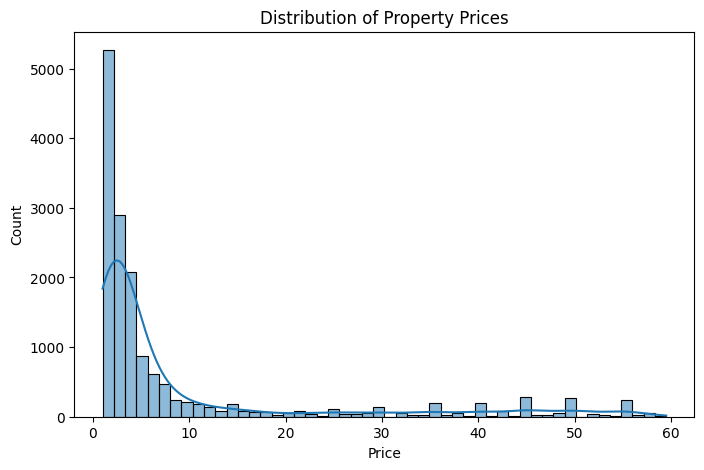

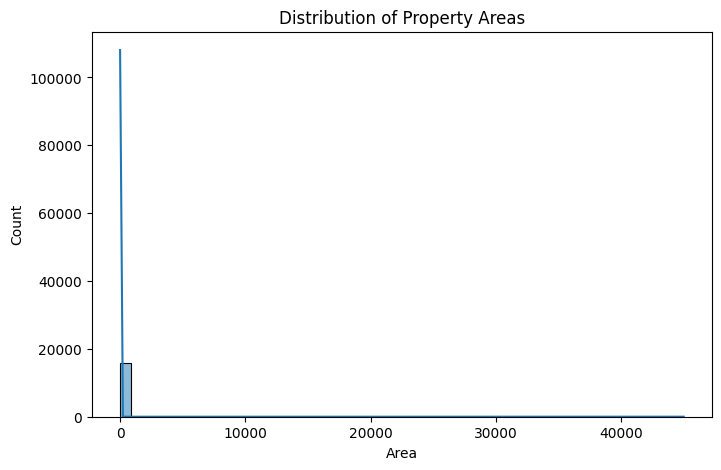

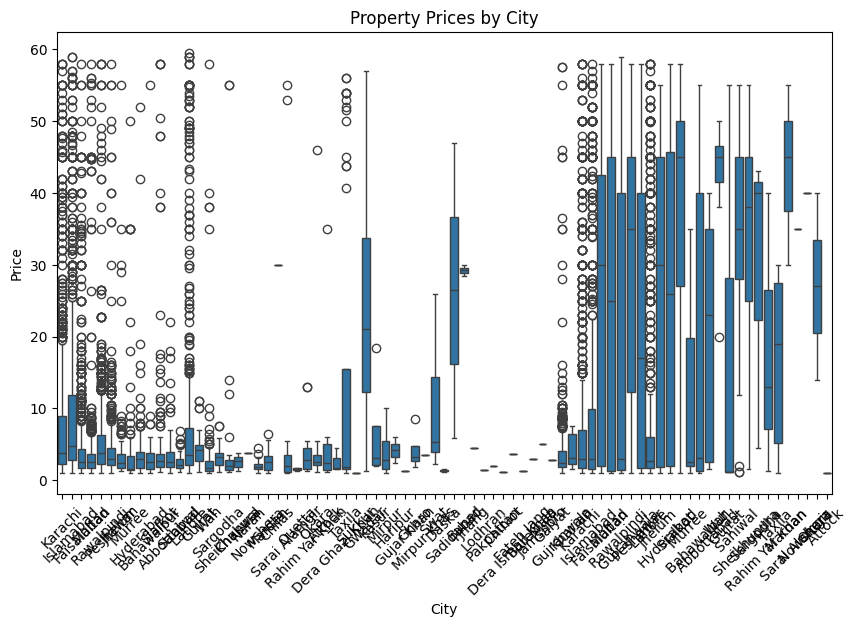

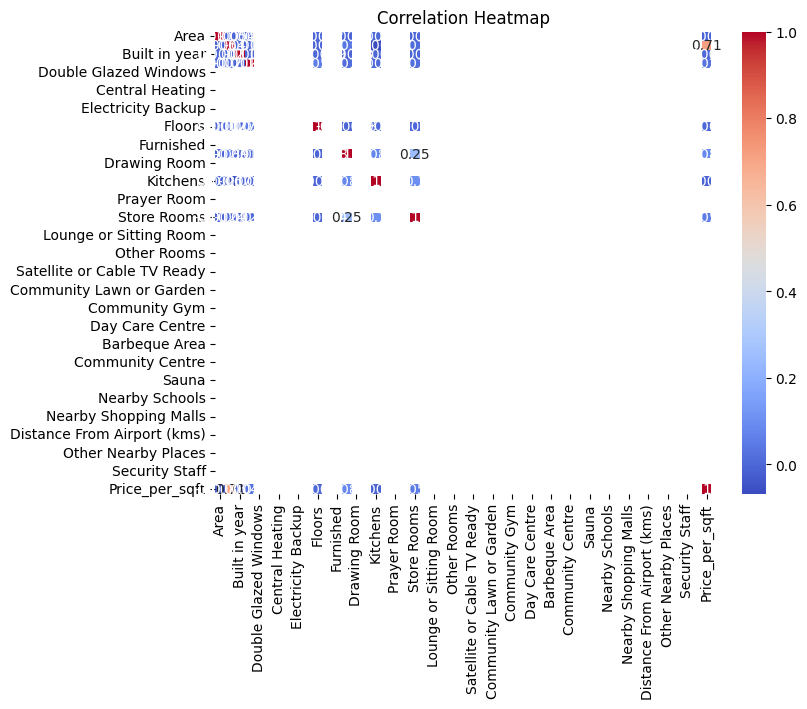

In [ ]:
# =========================
# 6. Univariate & Bivariate Analysis
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.show()


if 'Area' in df.columns:
  plt.figure(figsize=(8,5))
  sns.histplot(df['Area'], bins=50, kde=True)
  plt.title('Distribution of Property Areas')
  plt.show()


if 'City' in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='City', y='Price', data=df)
  plt.xticks(rotation=45)
  plt.title('Property Prices by City')
  plt.show()


if 'Property Type' in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='Property Type', y='Price', data=df)
  plt.xticks(rotation=45)
  plt.title('Prices by Property Type')
  plt.show()


# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**Violin/Box Plots for Price Comparisons**

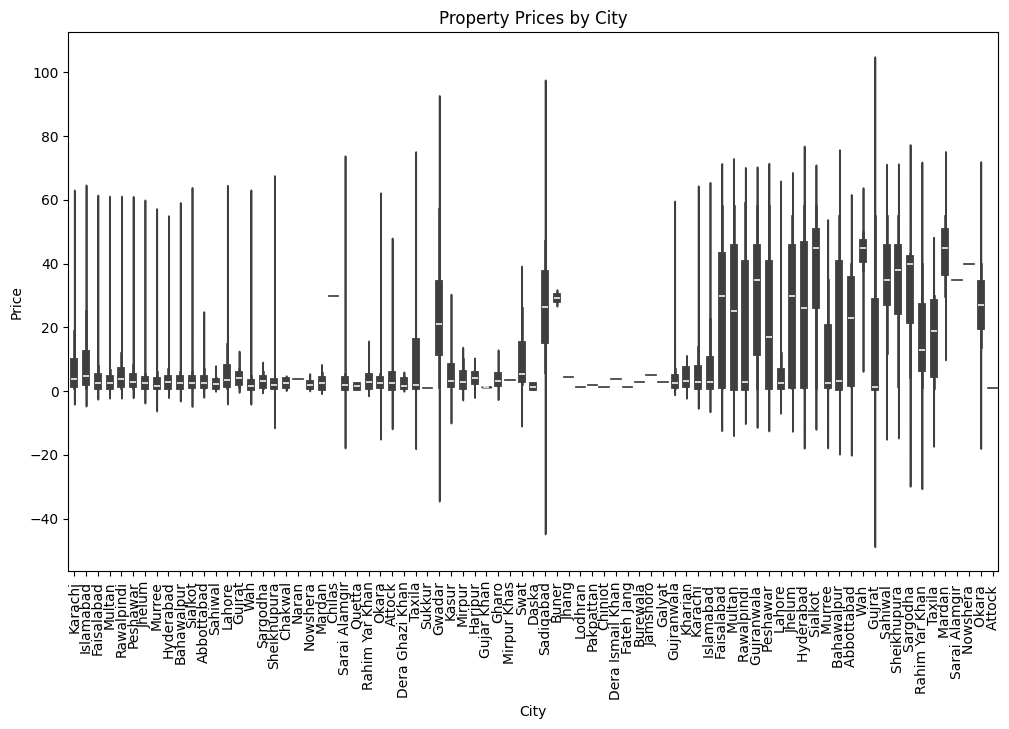

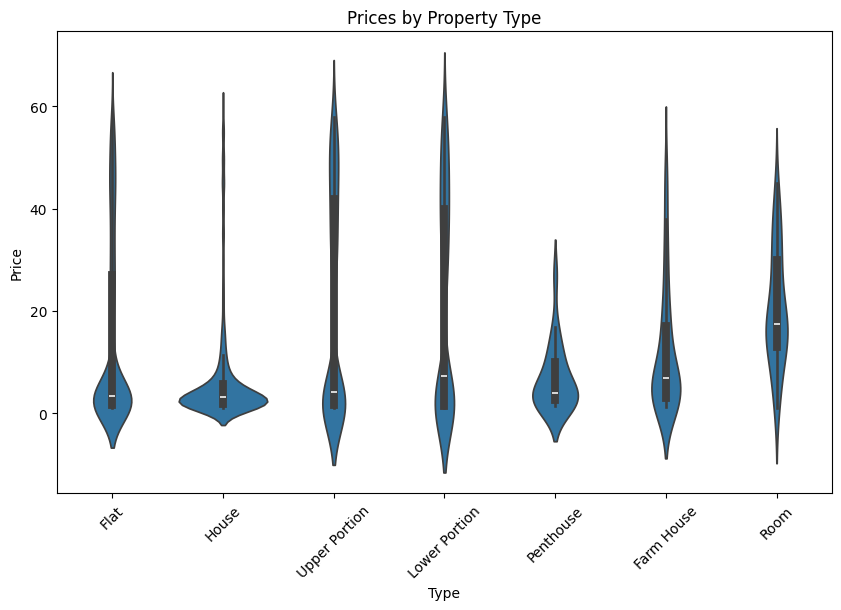

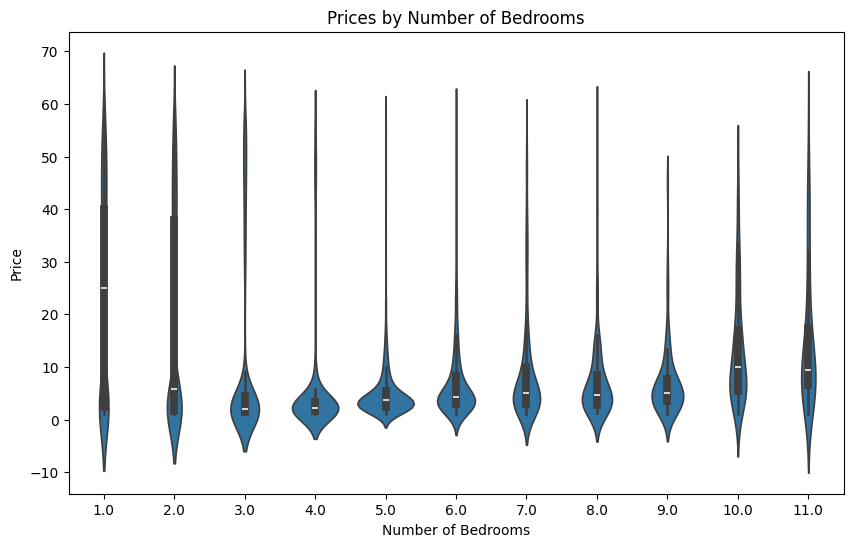

In [ ]:
# Violin plot or Box plot for Price vs. City
if 'City' in df.columns and 'Price' in df.columns:
  plt.figure(figsize=(12, 7))
  sns.violinplot(x='City', y='Price', data=df) # Or sns.boxplot(x='City', y='Price', data=df)
  plt.xticks(rotation=90)
  plt.title('Property Prices by City')
  plt.show()

# Violin plot or Box plot for Price vs. Property Type
if 'Type' in df.columns and 'Price' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.violinplot(x='Type', y='Price', data=df) # Or sns.boxplot(x='Type', y='Price', data=df)
  plt.xticks(rotation=45)
  plt.title('Prices by Property Type')
  plt.show()

# Violin plot or Box plot for Price vs. Bedrooms
# Ensure 'Bedrooms' is numeric or can be converted to numeric
if 'Bedrooms' in df.columns and 'Price' in df.columns:
  # Attempt to convert 'Bedrooms' to numeric, coercing errors to NaN
  df['Bedrooms_numeric'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
  # Drop rows where conversion failed if necessary, or handle NaNs appropriately for plotting
  # For simplicity in plotting, we might drop NaNs for this visualization
  df_plotting = df.dropna(subset=['Bedrooms_numeric'])

  if not df_plotting.empty:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Bedrooms_numeric', y='Price', data=df_plotting) # Or sns.boxplot(x='Bedrooms_numeric', y='Price', data=df_plotting)
    plt.title('Prices by Number of Bedrooms')
    plt.xlabel('Number of Bedrooms')
    plt.show()
  else:
      print("Could not create plot for Prices by Number of Bedrooms due to data issues.")

**INSIGHTS & RECOMMENDATIONS**

In [ ]:
print("Top 5 expensive cities:\n", df.groupby('City')['Price'].median().sort_values(ascending=False).head())
print("Top 5 cheapest cities:\n", df.groupby('City')['Price'].median().sort_values(ascending=True).head())

Top 5 expensive cities:
 City
Wah          45.0
Sialkot      45.0
Mardan       45.0
Nowshera     40.0
Sargodha     40.0
Name: Price, dtype: float64
Top 5 cheapest cities:
 City
Attock        1.00
Sukkur        1.05
Gujrat        1.20
Chiniot       1.20
Fateh Jang    1.30
Name: Price, dtype: float64
